# Q1
- File : Delivery_Time.csv
- Predict delivery time using sorting time
- Build a simple linear regression model by performing EDA
- Do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kurtosis
from scipy.stats import skew

# Import data

In [2]:
data = pd.read_csv("D:\Data Science Assignments\Simple Linear Regression\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.shape

(21, 2)

In [5]:
data = data.rename(columns = {'Delivery Time':'DT', 'Sorting Time':'ST'}, inplace = False)
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='DT', ylabel='ST'>

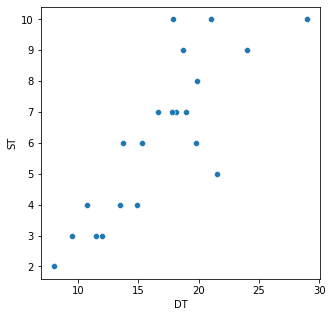

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.scatterplot(x ='DT', y ='ST', data=data, palette='Set1')

<function matplotlib.pyplot.show(close=None, block=None)>

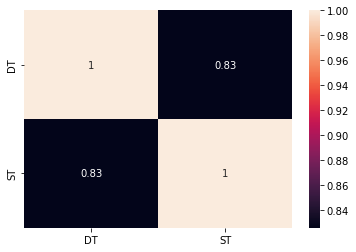

In [8]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show

In [9]:
data['DT'].unique()

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [10]:
data['DT'].value_counts()

21.00    1
10.75    1
17.83    1
8.00     1
18.11    1
13.75    1
14.88    1
12.03    1
11.50    1
16.68    1
19.83    1
13.50    1
18.75    1
17.90    1
9.50     1
19.00    1
15.35    1
29.00    1
24.00    1
19.75    1
21.50    1
Name: DT, dtype: int64

In [11]:
data['ST'].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5], dtype=int64)

In [12]:
data['ST'].value_counts()

7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: ST, dtype: int64

In [13]:
data.dtypes

DT    float64
ST      int64
dtype: object

In [14]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [15]:
data[data.duplicated()]

,DT,ST


<AxesSubplot:>

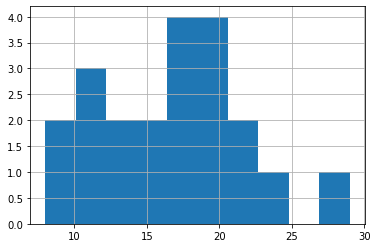

In [16]:
data['DT'].hist()

<AxesSubplot:>

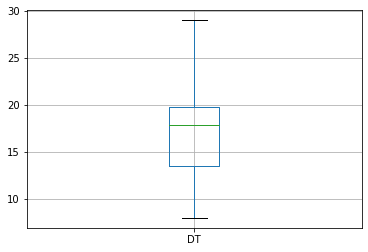

In [17]:
data.boxplot(column=['DT'],grid=True)

<AxesSubplot:>

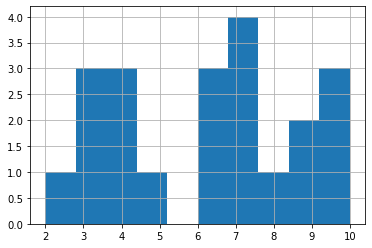

In [18]:
data['ST'].hist()

<AxesSubplot:>

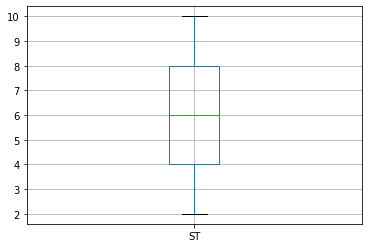

In [19]:
data.boxplot(column=['ST'],grid=True)

<AxesSubplot:xlabel='DT', ylabel='Density'>

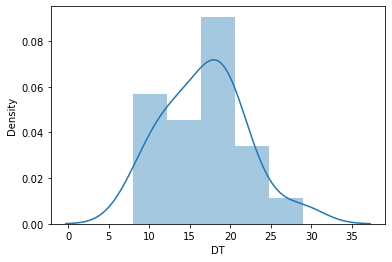

In [20]:
sns.distplot(data['DT'])

<AxesSubplot:xlabel='ST', ylabel='Density'>

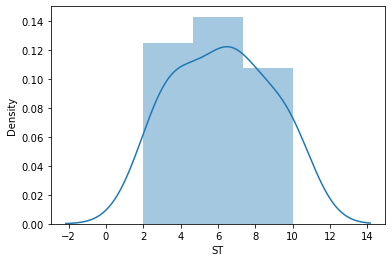

In [21]:
sns.distplot(data['ST'])

In [22]:
data['DT'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: DT, dtype: float64

In [23]:
data['ST'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: ST, dtype: float64

In [24]:
data.isnull().sum()

DT    0
ST    0
dtype: int64

In [25]:
cols= data.columns
cols

Index(['DT', 'ST'], dtype='object')

<AxesSubplot:>

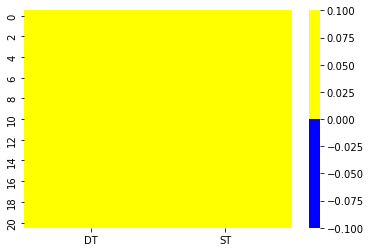

In [26]:
colours = ["Blue","Yellow"]
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

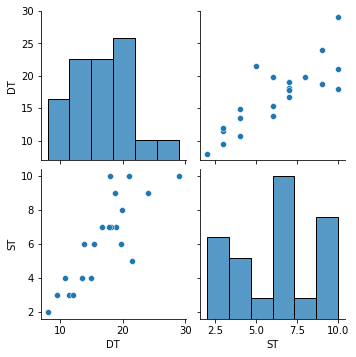

In [27]:
sns.pairplot(data)

<AxesSubplot:xlabel='DT'>

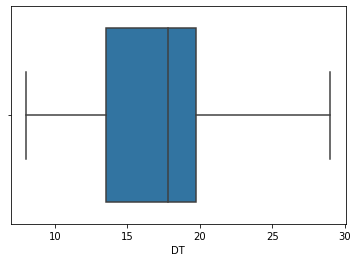

In [28]:
sns.boxplot('DT', data=data)

<AxesSubplot:xlabel='ST'>

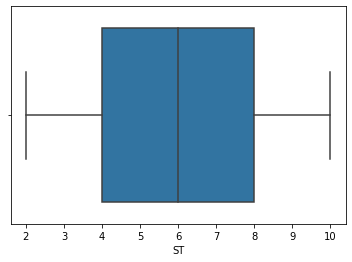

In [29]:
sns.boxplot('ST', data=data)

<AxesSubplot:>

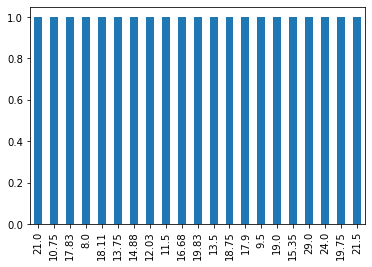

In [30]:
data['DT'].value_counts().plot.bar()

<AxesSubplot:>

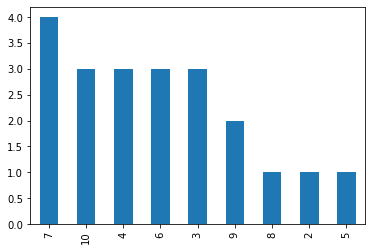

In [31]:
data['ST'].value_counts().plot.bar()

In [32]:
# OlS = Ordinary Least Squares #
import statsmodels.formula.api as smf
model = smf.ols('DT ~ ST', data= data).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

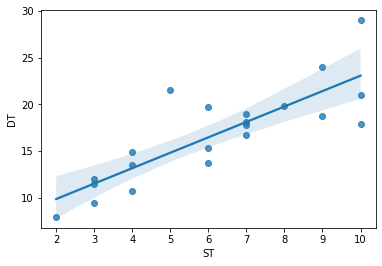

In [33]:
# Best Fit Line #
sns.regplot(x=data['ST'], y=data['DT'])

In [34]:
# Finding Coefficients #
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [35]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

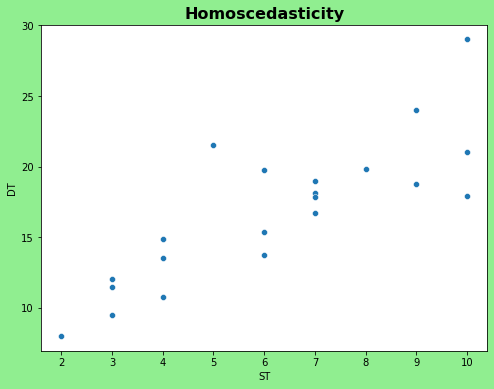

In [36]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['ST'], y = data['DT'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [37]:
# Finding t_values #
model.tvalues

Intercept    3.823349
ST           6.387447
dtype: float64

In [38]:
# Finding p_values #
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [39]:
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


e (error) - vertical distance between the actual 'Delivery Time' & 'Sorting Time'

In [40]:
36.582734 + (1.649020 * 21.00)

71.212154

In [41]:
data['Predicted'] = model.fittedvalues
data[0:5]

,DT,ST,Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [42]:
data['Predicted'] = 6.582734 + (1.649020 * data['DT'])
data[0:5]

,DT,ST,Predicted
0,21.00,10,41.212154
1,13.50,4,28.844504
2,19.75,6,39.150879
3,24.00,9,46.159214
4,29.00,10,54.404314


In [43]:
data['Error'] = model.resid
data[0:5]

,DT,ST,Predicted,Error
0,21.00,10,41.212154,-2.072933
1,13.50,4,28.844504,0.321186
2,19.75,6,39.150879,3.273147
3,24.00,9,46.159214,2.576087
4,29.00,10,54.404314,5.927067


In [44]:
data['Error1'] = data['DT'] - data['Predicted']
data[0:5]

,DT,ST,Predicted,Error,Error1
0,21.00,10,41.212154,-2.072933,-20.212154
1,13.50,4,28.844504,0.321186,-15.344504
2,19.75,6,39.150879,3.273147,-19.400879
3,24.00,9,46.159214,2.576087,-22.159214
4,29.00,10,54.404314,5.927067,-25.404314


In [45]:
data['Error_Sq'] = (data['Error']) **2
data[0:5]

,DT,ST,Predicted,Error,Error1,Error_Sq
0,21.00,10,41.212154,-2.072933,-20.212154,4.297051
1,13.50,4,28.844504,0.321186,-15.344504,0.103161
2,19.75,6,39.150879,3.273147,-19.400879,10.713489
3,24.00,9,46.159214,2.576087,-22.159214,6.636224
4,29.00,10,54.404314,5.927067,-25.404314,35.130124


In [46]:
Mean_Squared_Error = data['Error_Sq'].mean()
Mean_Squared_Error

7.7933115485840645

In [47]:
model.rsquared

0.6822714748417231

In [48]:
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

Predict for new data point

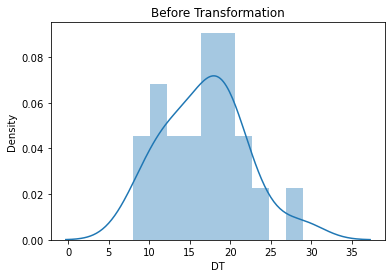

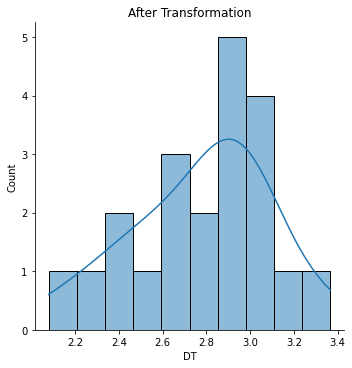

In [49]:
sns.distplot(data['DT'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['DT']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

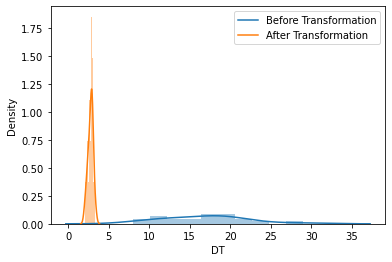

In [50]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['DT'], bins = 10, kde = True)
sns.distplot(np.log(data['DT']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

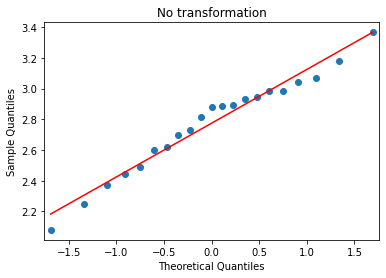

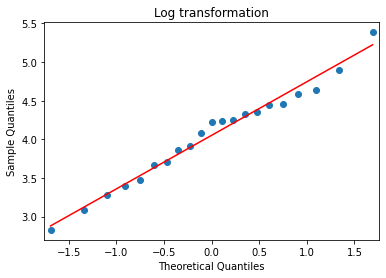

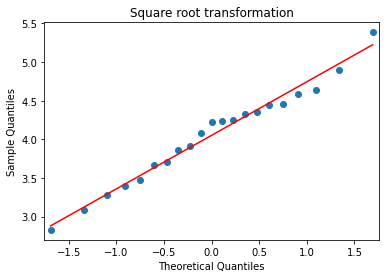

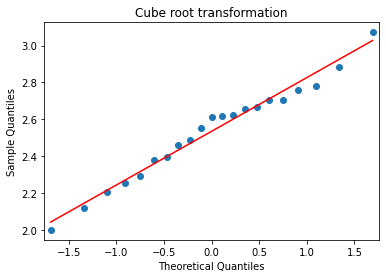

In [51]:
import statsmodels.api as smf
smf.qqplot(np.log(data['DT']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['DT']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['DT']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['DT']), line = 'r')
plt.title('Cube root transformation')
plt.show()

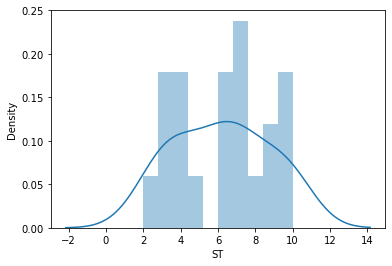

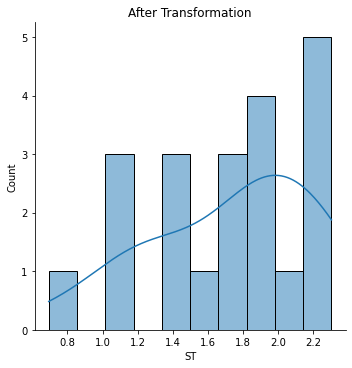

In [52]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['ST'], bins = 10, kde = True)
sns.displot(np.log(data['ST']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

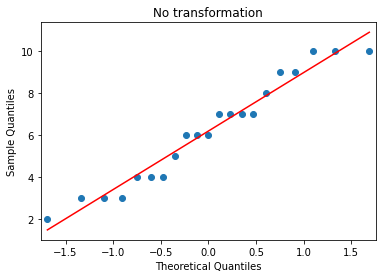

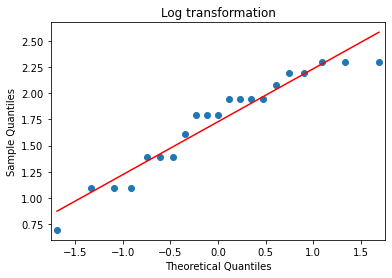

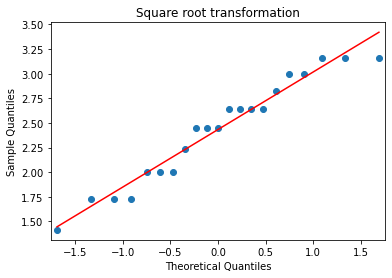

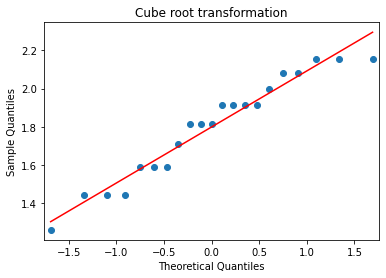

In [53]:
smf.qqplot(data['ST'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['ST']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['ST']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['ST']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [54]:
import statsmodels.formula.api as sm
model = sm.ols('ST~DT', data = data).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        08:48:29   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model1 = sm.ols('np.sqrt(ST)~np.sqrt(DT)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(ST)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           8.48e-07
Time:                        08:48:29   Log-Likelihood:                -2.3695
No. Observations:                  21   AIC:                             8.739
Df Residuals:                      19   BIC:                             10.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.5151      0.417     -1.236      0.232      -1.388       0.357
np.sqrt(DT)     0.7276      0.102      7.153      0.000       0.515       0.940
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.001
Skew:                          -0.005   Prob(JB):                         1.00
Kurtosis:                       3.029   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model2 = sm.ols('np.cbrt(ST)~np.cbrt(DT)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.cbrt(ST)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           4.90e-07
Time:                        08:48:29   Log-Likelihood:                 12.617
No. Observations:                  21   AIC:                            -21.23
Df Residuals:                      19   BIC:                            -19.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4315      0.302     -1.431      0.169      -1.063       0.200
np.cbrt(DT)     0.8800      0.118      7.433      0.000       0.632       1.128
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.031
Skew:                          -0.078   Prob(JB):                        0.985
Kurtosis:                       2.894   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model3 = sm.ols('np.log(ST)~np.log(DT)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(ST)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.60e-07
Time:                        08:48:29   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(DT)     1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Model Testing
- As Y = Beta0 + Beta1*(X)
- Finding Coefficient Parameters (Beta0 and Beta1 values)

In [59]:
model.params

Intercept   -0.756673
DT           0.413744
dtype: float64

In [60]:
print(model.tvalues,'\n',model.pvalues)

Intercept   -0.667290
DT           6.387447
dtype: float64 
 Intercept    0.512611
DT           0.000004
dtype: float64


In [61]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

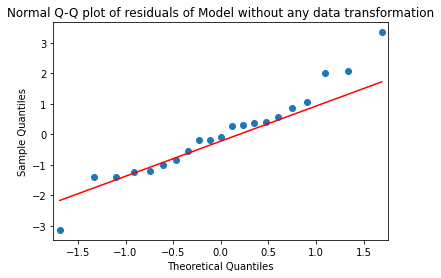

In [62]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [63]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

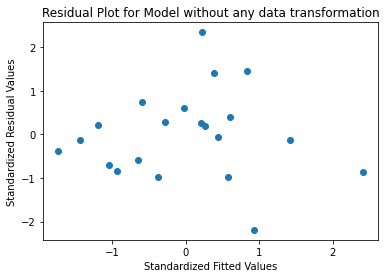

In [64]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# Model Validation

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
model1_pred_y =np.square(model1.predict(data['DT']))
model2_pred_y =pow(model2.predict(data['DT']),3)
model3_pred_y =np.exp(model3.predict(data['DT']))

In [67]:
model1_rmse =np.sqrt(mean_squared_error(data['ST'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['ST'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['ST'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 1.470098983317377 
model1= 1.4194810822762176 
model2= 1.432559499363077 
model3= 1.469962610512538


In [68]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model1'

# Predicting Values

In [69]:
# first model results without any transformation #
predicted2 = pd.DataFrame()
predicted2['DT'] = data.DT
predicted2['ST'] = data.ST
predicted2['Predicted_DT'] = pd.DataFrame(model.predict(predicted2.DT))
predicted2

,DT,ST,Predicted_DT
0,21.00,10,7.931943
1,13.50,4,4.828866
2,19.75,6,7.414763
3,24.00,9,9.173174
4,29.00,10,11.241892
5,15.35,6,5.594291
6,19.00,7,7.104456
7,9.50,3,3.173891
8,17.90,10,6.649338
9,18.75,9,7.001020


# Q2
- File : Salary_hike
- Build a prediction model for Salary_hike
- Build a simple linear regression model by performing EDA
- Do necessary transformations and select the best model using R or Python.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kurtosis
from scipy.stats import skew

# Import Data

In [71]:
data = pd.read_csv("D:\Data Science Assignments\Simple Linear Regression\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [72]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [73]:
data.shape

(30, 2)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [75]:
data = data.rename(columns = {'YearsExperience':'YE', 'Salary':'S'}, inplace = False)
data

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<function matplotlib.pyplot.show(close=None, block=None)>

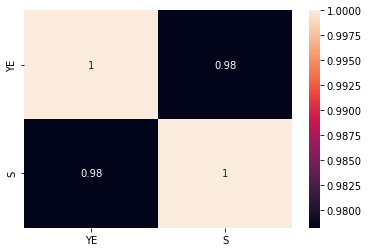

In [78]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show

In [79]:
data['YE'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [80]:
data['YE'].value_counts()

3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: YE, dtype: int64

In [81]:
data['S'].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [82]:
data['S'].value_counts()

39343.0     1
46205.0     1
122391.0    1
112635.0    1
116969.0    1
105582.0    1
109431.0    1
113812.0    1
101302.0    1
98273.0     1
91738.0     1
93940.0     1
81363.0     1
83088.0     1
66029.0     1
67938.0     1
61111.0     1
57081.0     1
56957.0     1
55794.0     1
63218.0     1
57189.0     1
64445.0     1
54445.0     1
60150.0     1
56642.0     1
39891.0     1
43525.0     1
37731.0     1
121872.0    1
Name: S, dtype: int64

In [83]:
data.dtypes

YE    float64
S     float64
dtype: object

In [84]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [85]:
data[data.duplicated()]

,YE,S


<AxesSubplot:>

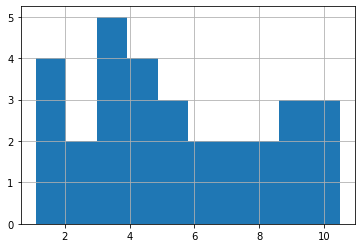

In [86]:
data['YE'].hist()

<AxesSubplot:>

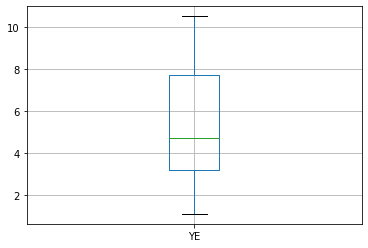

In [87]:
data.boxplot(column=['YE'],grid=True)

<AxesSubplot:>

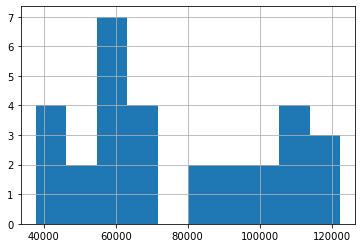

In [88]:
data['S'].hist()

<AxesSubplot:>

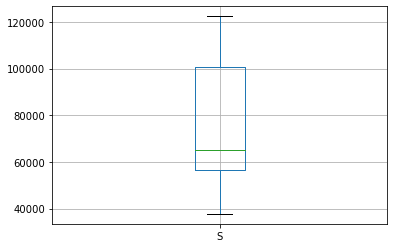

In [89]:
data.boxplot(column=['S'],grid=True)

<AxesSubplot:xlabel='YE', ylabel='Density'>

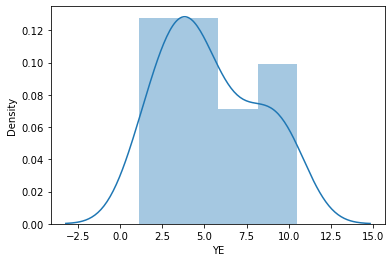

In [90]:
sns.distplot(data['YE'])

<AxesSubplot:xlabel='S', ylabel='Density'>

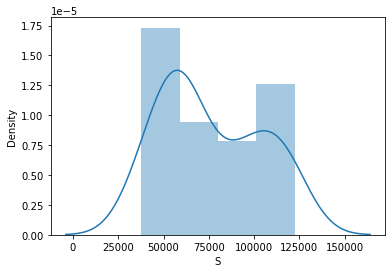

In [91]:
sns.distplot(data['S'])

In [92]:
data['YE'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YE, dtype: float64

In [93]:
data['S'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: S, dtype: float64

In [94]:
data.isnull().sum()

YE    0
S     0
dtype: int64

In [95]:
cols= data.columns
cols

Index(['YE', 'S'], dtype='object')

<AxesSubplot:>

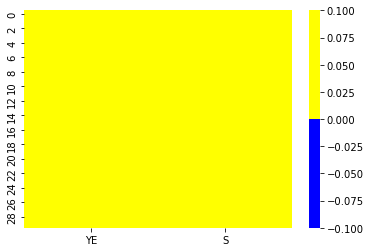

In [96]:
colours = ["Blue","Yellow"]
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

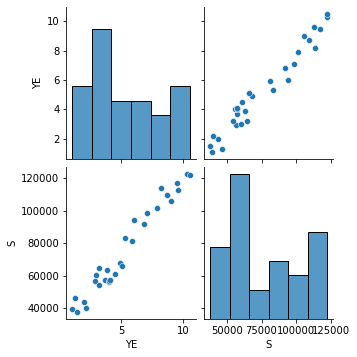

In [97]:
sns.pairplot(data)

<AxesSubplot:xlabel='YE'>

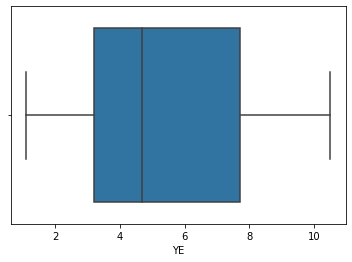

In [98]:
sns.boxplot('YE', data=data)

<AxesSubplot:xlabel='S'>

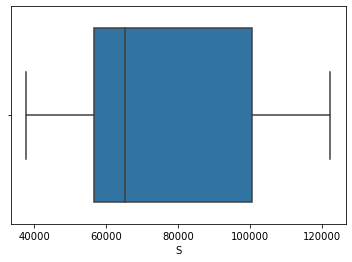

In [99]:
sns.boxplot('S', data=data)

<AxesSubplot:>

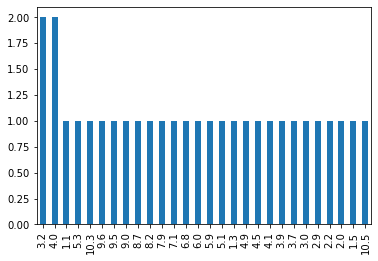

In [100]:
data['YE'].value_counts().plot.bar()

<AxesSubplot:>

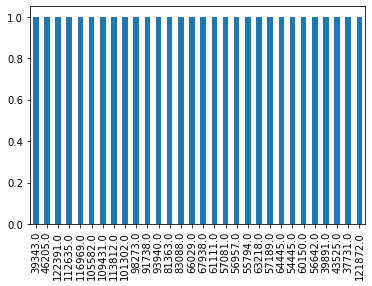

In [101]:
data['S'].value_counts().plot.bar()

In [102]:
# OlS = Ordinary Least Squares #
import statsmodels.formula.api as smf
model = smf.ols('YE ~ S', data= data).fit()

<AxesSubplot:xlabel='S', ylabel='YE'>

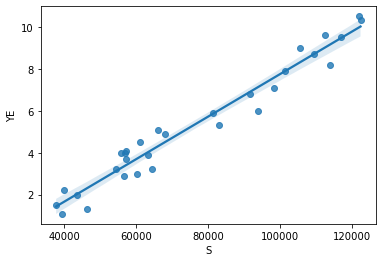

In [103]:
sns.regplot(x=data['S'], y=data['YE'])

In [104]:
# Finding Coefficients #
model.params

Intercept   -2.383161
S            0.000101
dtype: float64

In [105]:
data.head()

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


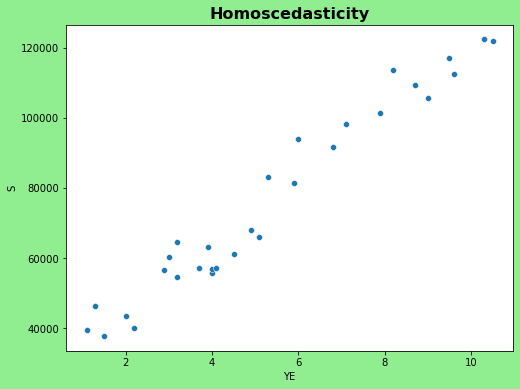

In [106]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['YE'], y = data['S'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [108]:
# Finding t_values #
model.tvalues

Intercept    -7.281283
S            24.950094
dtype: float64

In [109]:
# Finding p_values #
model.pvalues

Intercept    6.300123e-08
S            1.143068e-20
dtype: float64

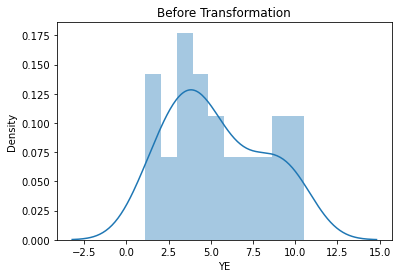

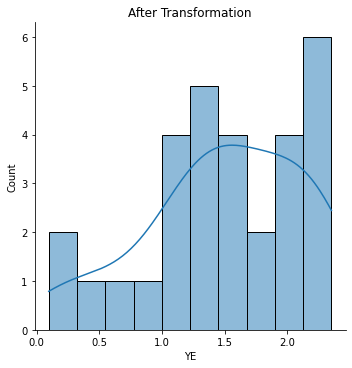

In [110]:
sns.distplot(data['YE'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['YE']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

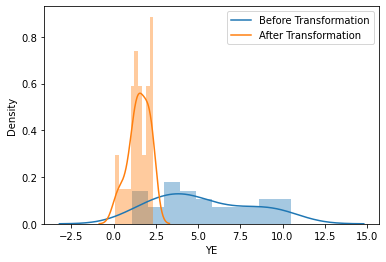

In [111]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['YE'], bins = 10, kde = True)
sns.distplot(np.log(data['YE']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

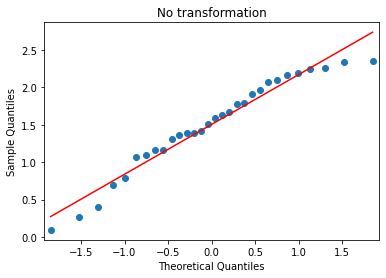

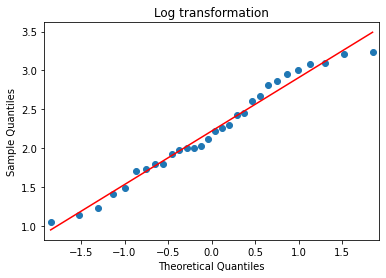

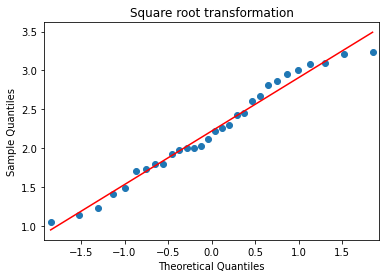

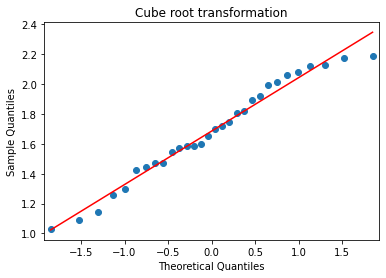

In [112]:
import statsmodels.api as smf
smf.qqplot(np.log(data['YE']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['YE']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['YE']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['YE']), line = 'r')
plt.title('Cube root transformation')
plt.show()

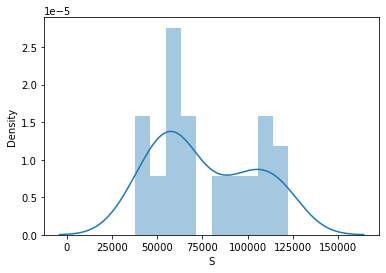

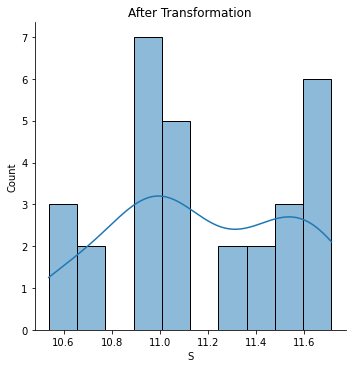

In [113]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['S'], bins = 10, kde = True)
sns.displot(np.log(data['S']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

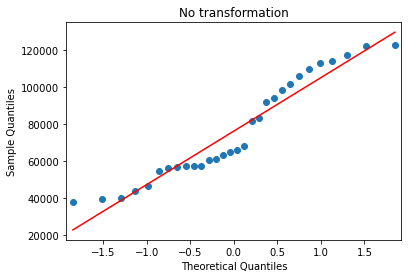

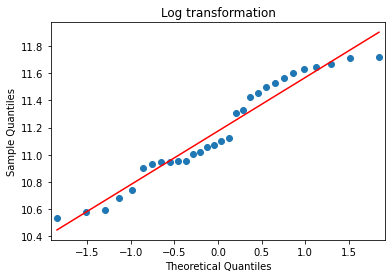

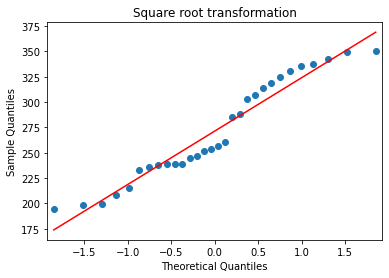

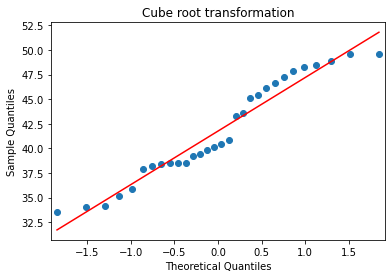

In [114]:
smf.qqplot(data['S'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['S']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['S']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['S']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [115]:
import statsmodels.formula.api as sm
model = sm.ols('S~YE', data = data).fit()

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        08:48:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
model1 = sm.ols('np.sqrt(S)~np.sqrt(YE)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(S)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           7.58e-19
Time:                        08:48:34   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YE)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model2 = sm.ols('np.cbrt(S)~np.cbrt(YE)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.cbrt(S)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           6.37e-18
Time:                        08:48:34   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YE)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
model3 = sm.ols('np.log(S)~np.log(YE)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(S)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           7.40e-16
Time:                        08:48:34   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YE)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Model Testing
- As Y = Beta0 + Beta1*(X)
- Finding Coefficient Parameters (Beta0 and Beta1 values)

In [120]:
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

- Intercept Beta0 value = 25792.20
- YearsExperience Beta1 value = 9449.96
- Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
- Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [121]:
print(model.tvalues,'\n',model.pvalues)

Intercept    11.346940
YE           24.950094
dtype: float64 
 Intercept    5.511950e-12
YE           1.143068e-20
dtype: float64


- (Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12
- (daily) Beta1: tvalue=24.95, pvalue= 1.143068e-20
- As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.
- R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
- Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [122]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

- Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%
- Residual Analysis
- Test for Normality of Residuals (Q-Q Plot)

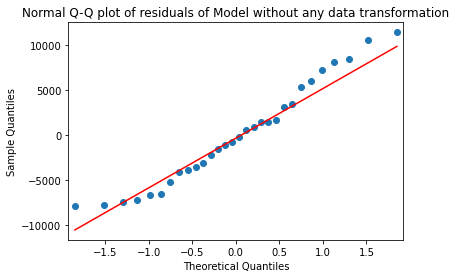

In [123]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

- As you can notice in the above plot
- The first model follows normal distribution
- Residual Plot to check Homoscedasticity or Hetroscedasticity

In [124]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

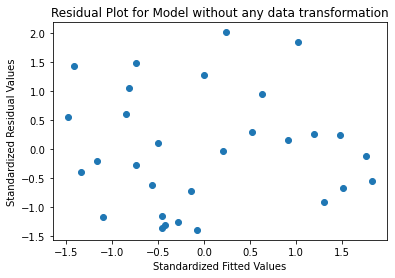

In [125]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

- As you can notice in the above plots
- The Model have Homoscedasciticity.
- The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
- Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

# Model Validation

- We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.
- Comparing different models with respect to the Root Mean Squared Errors

In [126]:
from sklearn.metrics import mean_squared_error

In [127]:
model1_pred_y =np.square(model1.predict(data['YE']))
model2_pred_y =pow(model2.predict(data['YE']),3)
model3_pred_y =np.exp(model3.predict(data['YE']))

In [128]:
model1_rmse =np.sqrt(mean_squared_error(data['S'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['S'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['S'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119394 
model1= 5960.647096174305 
model2= 6232.815455835858 
model3= 7219.716974372787


In [129]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

- As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values
- Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value

# Predicting values

In [130]:
# first model results without any transformation #
predicted2 = pd.DataFrame()
predicted2['YE'] = data.YE
predicted2['S'] = data.S
predicted2['Predicted_S_Hike'] = pd.DataFrame(model.predict(predicted2.YE))
predicted2

,YE,S,Predicted_S_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
